# Python Group Project -3 (Group Code: G2B4)
- Web Development using Flask

## Domain
- Finance & Banking

## Context:

- Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customers first apply for a home loan after that company manually validates the customer eligibility for loan.

- Company wants to automate the loan eligibility process based on customer detail provided while filling the details online. They need a web application where a user can access their website and register, login, and enter the required details such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others for checking the eligibility for the home loan.

## Project Objective:

1) This is a standard supervised classification task. A classification problem where we have to predict whether a customer is eligible for loan or not based on a given set of independent variable(s).
2) To build a Python Flask ML application where a user has to get registered by entering the username and password and login to the website and then enter their details to check whether they are eligible for loan or not.

# Steps to the project: [Total score: 15 points]

## Model Building and saving the model using Pickle

### 1. Import required libraries and read the dataset. (2)

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from scipy import stats
from sklearn.cluster import KMeans
from scipy.stats import zscore
from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer

In [2]:
# Reading the csv file 

df = pd.read_csv('loan_approval_data.csv')
df.head(3)


,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features. (2)

In [3]:
# Checking first few samples

df.sample(5)


,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
454,lp002453,male,no,0.0,graduate,yes,7085,0.0,84.0,360.0,1.0,semiurban,y
370,lp002194,female,no,0.0,graduate,yes,15759,0.0,55.0,360.0,1.0,semiurban,y
229,lp001761,male,no,0.0,graduate,yes,6400,0.0,200.0,360.0,1.0,rural,y
264,lp001872,male,no,0.0,graduate,yes,5166,0.0,128.0,360.0,1.0,semiurban,y
257,lp001854,male,yes,3.0,graduate,no,5250,0.0,94.0,360.0,1.0,urban,n


In [4]:
# Checking shape of the dataset

df.shape

(614, 13)

In [5]:
# Checking the dataset info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


### 3. Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features. (2)

In [6]:
# Checking for duplicated records

len(df[df.duplicated()])


0

#### Inferences:
- From the above result, we can observe that there are no duplicate records found. Hence no record is dropped from the dataset

In [ ]:
# dropping redundant columns like loan_id

df = df.drop(['loan_id'], axis=1)
df.head(5)

In [11]:
# Checking the the missing values in all the columns

df.isna().sum()

gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [ ]:
# imputing na values in 'weight' column
df['weight'].fillna( df['weight'].median(), inplace=True )

# imputing na values in 'rating' column
df['rating'].fillna( df['rating'].median(), inplace=True )

# imputing na values in 'rented for' column

mode_value = ( df['rented for'].mode()[0] )
df['rented for'].fillna( mode_value, inplace=True )

# imputing na values in 'age' column

df['age'].fillna( df['age'].median(), inplace=True )

# imputing categorical columns with their respective 'mode'
df['bust size'] = df['bust size'].fillna(df['bust size'].mode()[0])
df['body type'] = df['body type'].fillna(df['body type'].mode()[0])

df.isna().sum()


#### Inferences:
-    Total count of missing entries in each column is observed
-    All null or NaN values are imputed as: 
        - mode for categorical columns
        - median for numerical columns
-    Finally, all column information is retrieved and it is verified that there are no null values in the dataset

## 4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations. (2)

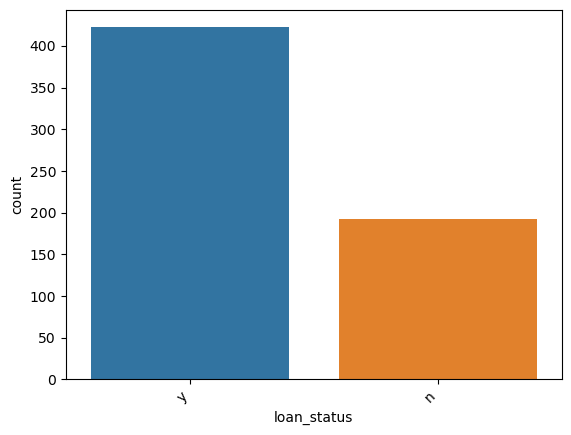

In [12]:

sns.countplot(x='loan_status', data=df)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


<Axes: ylabel='proportion'>

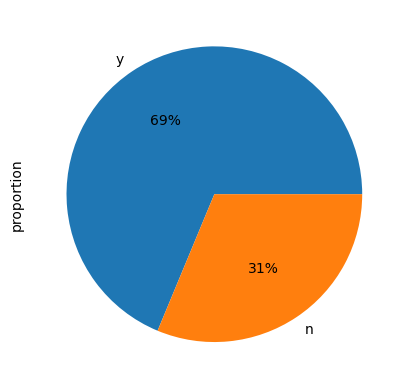

In [13]:
## plotting the distribution of column 'rented for' with percentage values in pie-chart

df['loan_status'].value_counts(normalize=True).plot(kind='pie', autopct='%1.0f%%')

#### Inferences:

- The above plots show the distribution of Rented-for categories over the dataset
- It is observed that customers rent outfits mostly for 'weddings' followed by 'formal affair' and least for 'vacation'


## 5. Encode the categorical data. (2)

In [116]:
# keeping copy of df before encoding
dfc = df.copy()
dfc.head()


,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0
2,fit,34b,135.0,10.0,party,hourglass,sheath,64.0,4,32.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0


In [117]:
# Encoding categorical columns using LabelEncoder()

categorical_columns = ['fit', 'bust size','rented for', 'body type', 'category']
le = LabelEncoder()

for col in categorical_columns:
    df[col] = le.fit_transform( df[col] )

df.sample(5)

,fit,bust size,weight,rating,rented for,body type,category,height,size,age
165025,0,51,135.0,10.0,1,1,45,69.0,16,47.0
154117,0,63,160.0,10.0,7,1,53,68.0,14,26.0
19383,0,37,135.0,8.0,6,5,46,63.0,4,27.0
10259,0,38,148.0,10.0,1,3,32,65.0,8,29.0
125645,0,26,135.0,10.0,6,3,20,63.0,12,32.0


In [118]:
## Checking whether all columns changed to numeric datatypes(int/float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  int32  
 1   bust size   192544 non-null  int32  
 2   weight      192544 non-null  float64
 3   rating      192544 non-null  float64
 4   rented for  192544 non-null  int32  
 5   body type   192544 non-null  int32  
 6   category    192544 non-null  int32  
 7   height      192544 non-null  float64
 8   size        192544 non-null  int64  
 9   age         192544 non-null  float64
dtypes: float64(4), int32(5), int64(1)
memory usage: 11.0 MB


#### Inferences:
- All categorical columns are encoded and now converted to numerical type using the LabelEncoder technique

## 13. Standardize the data, so that the values are within a particular range. (1)

In [119]:
# keeping a copy of the ecnoded data before standardizing

dfc_2 = df.copy()

In [120]:
# scaling the data to unoform level using standard scalaer

numeric_cols = df.select_dtypes(include=['int32','int64','float64']).columns
print(numeric_cols)
ss = StandardScaler()
scaled_df = pd.DataFrame(ss.fit_transform(df), columns=numeric_cols)
scaled_df.head()

Index(['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type',
       'category', 'height', 'size', 'age'],
      dtype='object')


,fit,bust size,weight,rating,rented for,body type,category,height,size,age
0,-0.556291,-0.004640,-0.000957,0.634498,0.514420,0.020953,1.569310,1.139905,0.206575,-0.782912
1,-0.556291,-0.187210,-0.249202,0.634498,-0.456753,1.927582,-0.307247,0.387367,-0.028862,0.571310
2,-0.556291,-0.187210,-0.100255,0.634498,0.028833,0.020953,1.647500,-0.365171,-0.970608,-0.105801
3,-0.556291,-0.095925,-0.100255,-0.764242,-0.942340,0.656496,-0.620006,0.011098,-0.499735,0.232754
4,-0.556291,-0.187210,0.396235,0.634498,1.000007,-1.250132,-0.307247,1.516174,-0.028862,-0.952190


#### Inferences:
- The provided dataset is standardized using the Standard Scaler technique and all columns are brought to a particular range for performing computation and analysis

# Principal Component Analysis and Clustering: [ Score: 23 point ]

## 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same. (7)

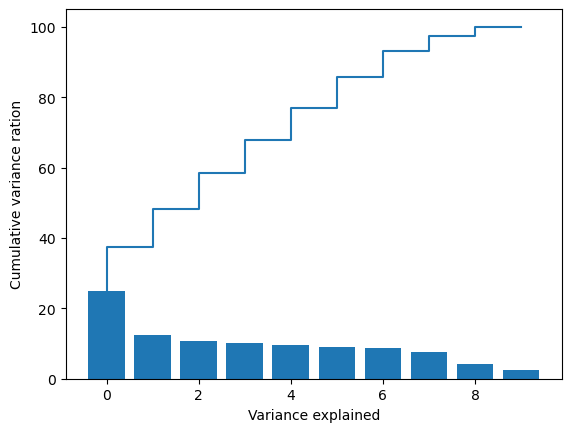

In [121]:
# covariance matrix
cov_matrix = np.cov(scaled_df.T)
cov_matrix

# eig values & eig vectors
eig_values, eig_vectors = np.linalg.eig(cov_matrix)

total = sum(eig_values)

variance_explained = [ (i/total)*100 for i in sorted(eig_values, reverse=True) ]
cumulative_variance_explained = np.cumsum(variance_explained)

#scree plot
plt.bar(range(10),variance_explained)
plt.step(range(10),cumulative_variance_explained)
plt.xlabel("Variance explained")
plt.ylabel("Cumulative variance ration")
plt.show()
    

In [122]:
# pca
pca = PCA(n_components=8)
pca_df = pd.DataFrame( pca.fit_transform(scaled_df),columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8'] )
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.203487,-0.899885,0.405063,-1.257026,1.487580,0.160267,-0.664170,-0.030447
1,-0.634696,-0.691919,0.441926,0.484488,-0.879561,0.450954,-1.718851,-0.190668
2,-0.849174,-0.655111,1.142405,-0.209658,1.239714,0.270608,0.131536,-0.093792
3,-0.508399,0.197023,0.390390,0.111460,-1.200789,-0.059148,-0.392013,0.880419
4,0.610949,-1.232839,-1.257352,-1.317568,0.725163,-0.999072,0.137705,0.105027


- It is observed from the above Scree plot, that first 8 principal components are explaining about 90-95% of the variation.
- Hence, the optimal number of principal componets is chosen as 8

## 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data) (8)

### a. Find the optimal K Value using elbow plot for K Means clustering.

Text(0.5, 1.0, 'Elbow Plot')

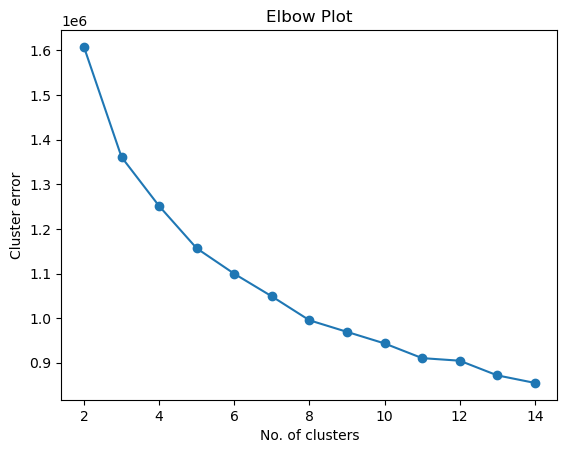

In [123]:
# for k means clustering we have to find out first the optimum value of k
# so we have to plot an elbow plot

cluster_range = range(2,15)
cluster_errors = []
for i in cluster_range:
    cluster = KMeans(n_clusters=i,random_state=100)
    cluster.fit(pca_df)
    cluster_errors.append(cluster.inertia_)

cluster_df = pd.DataFrame({'num_clusters':cluster_range, 'cluster_errors':cluster_errors})

plt.plot(cluster_df['num_clusters'],cluster_df['cluster_errors'], marker='o')
plt.xlabel("No. of clusters")
plt.ylabel("Cluster error")
plt.title('Elbow Plot')



- From the above Elbow plot, it is observed that at cluster K=4, the inertia descreases significantly
- Hence we are selecting the optimal cluster value as K=4 here

### b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.

In [124]:
# Generating the labels for K means clustering

kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(pca_df)
labels = kmeans.labels_
labels_df = pd.DataFrame({'Labels':labels})
labels_df.head()

,Labels
0,3
1,1
2,3
3,1
4,3


In [125]:
# Joining the pca_data with the labels

kmeans_df = pca_df.join(labels_df)
kmeans_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,Labels
0,0.203487,-0.899885,0.405063,-1.257026,1.487580,0.160267,-0.664170,-0.030447,3
1,-0.634696,-0.691919,0.441926,0.484488,-0.879561,0.450954,-1.718851,-0.190668,1
2,-0.849174,-0.655111,1.142405,-0.209658,1.239714,0.270608,0.131536,-0.093792,3
3,-0.508399,0.197023,0.390390,0.111460,-1.200789,-0.059148,-0.392013,0.880419,1
4,0.610949,-1.232839,-1.257352,-1.317568,0.725163,-0.999072,0.137705,0.105027,3


<Axes: xlabel='PC1', ylabel='PC2'>

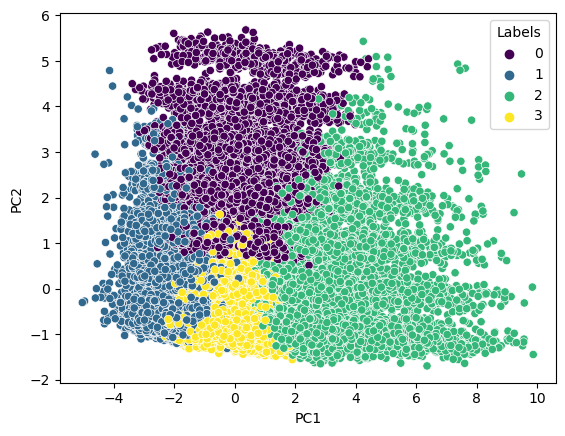

In [126]:
# Drawing the scatterplot to dispaly distribution of datapoints in PC1 & PC2 among the clusters

sns.scatterplot(x='PC1', y='PC2', data=kmeans_df, hue='Labels', palette='viridis')

### c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

In [127]:
from sklearn.metrics import silhouette_score

pca_df_5k = pca_df.head(5000)

In [128]:
# Getting the Silhouette scores for Agglomorative clustering

print("Cluster --> Silhouette Score")
for i in range(2,15):
    kmeans = KMeans(n_clusters=i, random_state=100)
    kmeans_model = kmeans.fit(pca_df_5k)
    labels = kmeans.predict(pca_df_5k)
    print(i, "      =>  ", silhouette_score(pca_df_5k,labels))


Cluster --> Silhouette Score
2       =>   0.15511558048141036
3       =>   0.1176181294727161
4       =>   0.12885379864241878
5       =>   0.11775308386231971
6       =>   0.09799065522335106
7       =>   0.10580362302558599
8       =>   0.12213230829565727
9       =>   0.12254253255368697
10       =>   0.11965634149930338
11       =>   0.12034924939926411
12       =>   0.11278524281696287
13       =>   0.12603409480698552
14       =>   0.12530064679496877


 - We have obtained the Silhoutte scores for various clusters. Further, it is observed from the above Silhoutte score, that the score is highest for cluster 2 when first 5000 samples are taken only (pca_df_5k).
 - While in Elbow plot we found that K is around 4 as the optimal cluster size in K Means clustering technique using the original scaled datasheet

## 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data) (8)

### a. Find the optimal K Value using dendrogram for Agglomerative clustering.

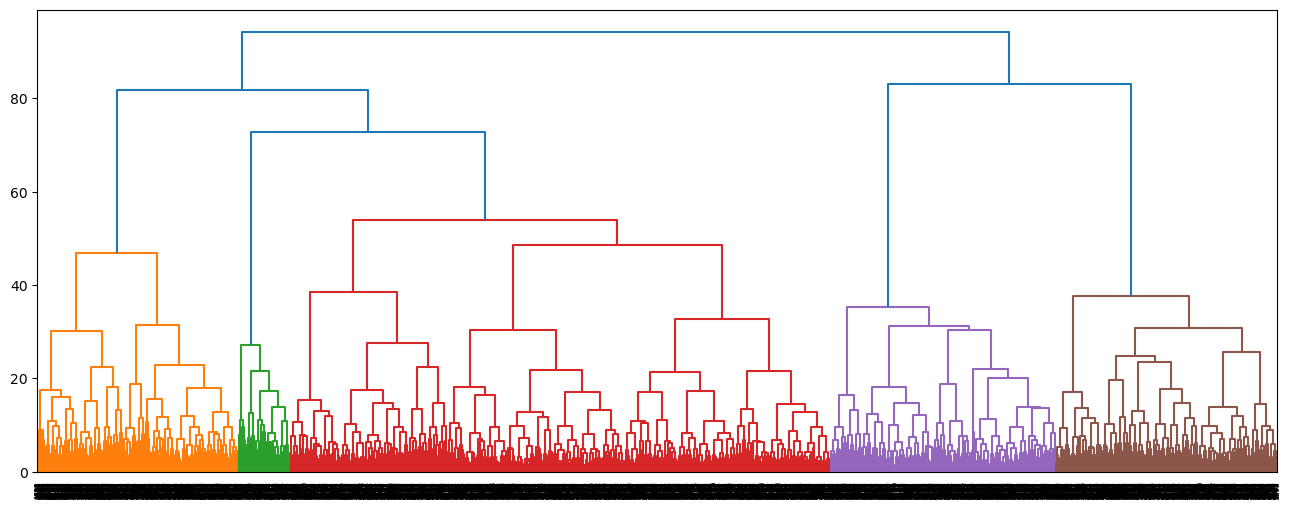

In [129]:
# Drawing the dendrogram for Agglomerative clustering

scaled_df_5k = scaled_df.head(5000)     # using first 5000 sample scaled data as total dataset is very large

plt.figure(figsize=(16,6))
merge = linkage(scaled_df_5k, method='ward')
dendrogram(merge, leaf_rotation=90)

plt.show()

### b. Build a Agglomerative clustering model using the obtained optimal K value observed from dendrogram.

In [130]:
## Building hierarchical clustering model using the optimal clusters size as 4 using original data

hie_cluster = AgglomerativeClustering(n_clusters=4, linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_df_5k)

## Creating a dataframe of the labels
hie_cluster_df = pd.DataFrame({'Labels':hie_cluster.labels_})

hie_cluster_df.head(5)

,Labels
0,3
1,2
2,3
3,0
4,0


In [131]:
df_hier = dfc.head(5000).join(hie_cluster_df)
df_hier.head()

,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0,3
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0,2
2,fit,34b,135.0,10.0,party,hourglass,sheath,64.0,4,32.0,3
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0,0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0,0


### c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time)

In [132]:
# Getting the Silhouette scores for Agglomorative clustering

from sklearn.metrics import silhouette_score
for i in range(2,25):
    hier = AgglomerativeClustering(n_clusters=i)
    hier_model = hier.fit(scaled_df_5k)
    labels = hier.fit_predict(scaled_df_5k)
    print(i, " => ", silhouette_score(scaled_df_5k,labels))



2  =>  0.09484934521493713
3  =>  0.09405963327935413
4  =>  0.10895122576953417
5  =>  0.11166424398094925
6  =>  0.08367827134759018
7  =>  0.0595268140506761
8  =>  0.06589513875687937
9  =>  0.06113005950471271
10  =>  0.061641349424494174
11  =>  0.06306520517568572
12  =>  0.04876970771828827
13  =>  0.05028009331087692
14  =>  0.04850480500955893
15  =>  0.0520098156844157
16  =>  0.05372378479703738
17  =>  0.0466582949682952
18  =>  0.04952588048680605
19  =>  0.050760942209929306
20  =>  0.05230355181079656
21  =>  0.052247659409346135
22  =>  0.05572302479152311
23  =>  0.05751348955392681
24  =>  0.05756325409575329


In [133]:
## Building hierarchical clustering model using the optimal clusters size as 5 using original data

hie_cluster = AgglomerativeClustering(n_clusters=5, linkage='ward')
hie_cluster_model = hie_cluster.fit(scaled_df_5k)

## Creating a dataframe of the labels
hie_cluster_df = pd.DataFrame({'Labels':hie_cluster.labels_})

hie_cluster_df.head(5)


,Labels
0,3
1,2
2,3
3,0
4,0


In [134]:
## joining the label dataframe with unscaled initial cleaned dataframe.(dfc)

hier_df = dfc.join(hie_cluster_df)
hier_df.head()


,fit,bust size,weight,rating,rented for,body type,category,height,size,age,Labels
0,fit,34d,137.0,10.0,vacation,hourglass,romper,68.0,14,28.0,3.0
1,fit,34b,132.0,10.0,other,straight & narrow,gown,66.0,12,36.0,2.0
2,fit,34b,135.0,10.0,party,hourglass,sheath,64.0,4,32.0,3.0
3,fit,34c,135.0,8.0,formal affair,pear,dress,65.0,8,34.0,0.0
4,fit,34b,145.0,10.0,wedding,athletic,gown,69.0,12,27.0,0.0


 - We have obtained the Silhoutte scores for varios clusters. Further, it is observed from the above Silhoutte score, that the score is highest for cluster = 5 (for first 5000 samples).
 - Scorers will vary as we change the sample size.
 - We obtain the optimal cluster size as K=5 for the considered sample subset of our original dataset in Agglomerative clustering model
 - But we choose K=5 as the optimal cluster size and built an Agglomerative clustering model using the original scaled datasheet (considering the entire dataset - where decrease in inertia is clearly steeply visible)

## Conclusion : [ Score: 2 point ]

### 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results. (2)

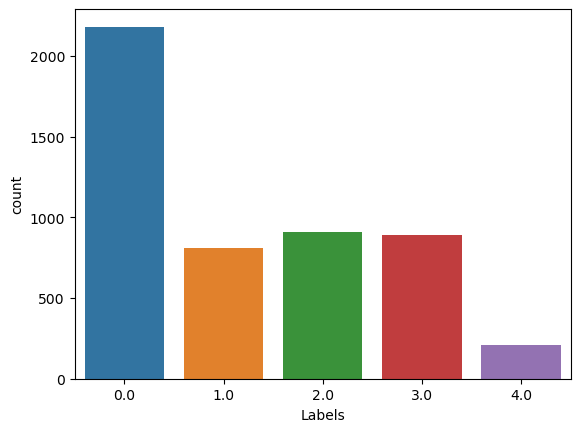

In [135]:
sns.countplot(x='Labels',data=hier_df)
plt.show()

- Cluster 0 has the the maximum no of customer and cluster 4 has the least.
- Other two clusters 1,2 & 3 are more or less equal sized

<Axes: xlabel='Labels', ylabel='weight'>

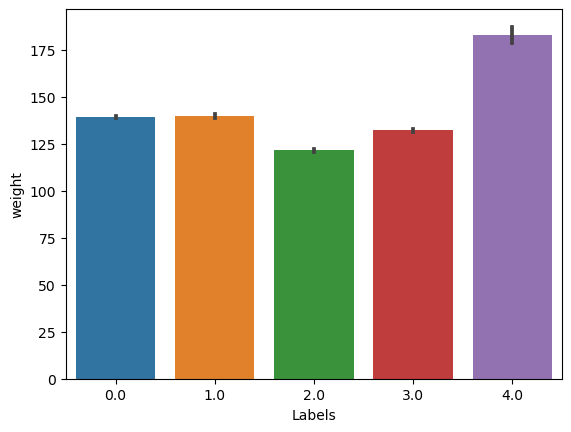

In [136]:
sns.barplot(x='Labels', y='weight', data=hier_df )

- Weight is more or less equally distributed in all the clusters except cluster 4

<Axes: xlabel='Labels', ylabel='size'>

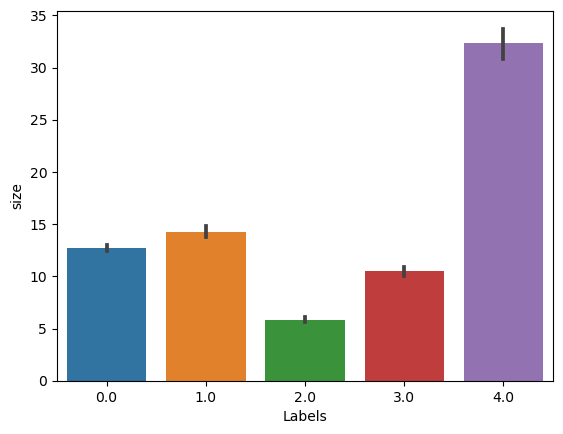

In [137]:
sns.barplot(x='Labels', y='size', data=hier_df )

- Cluster 4 has the maximum count for size

<Axes: xlabel='Labels', ylabel='count'>

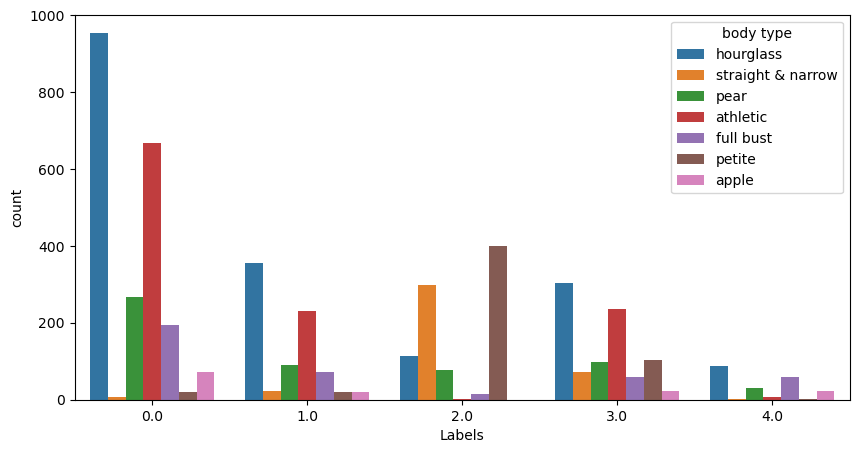

In [138]:
plt.figure(figsize=(10,5))
sns.countplot(x='Labels', hue='body type', data=hier_df )

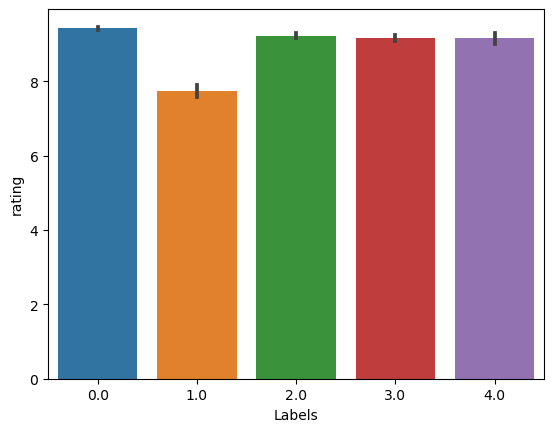

In [139]:
sns.barplot(y='rating', x='Labels', data=hier_df)
plt.show()


- Rating of customers in Cluster-1,2,3 & 4 are almost the same/ equal
